In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Câu 5

In [10]:
# Load dữ liệu
data = load_breast_cancer()
X = data.data
y = data.target

In [11]:
# Chia tập train và test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# tạo mô hình và huấn luyện
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_classifier.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = dt_classifier.predict(X_test)

In [12]:
# Tính accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.4f}")


print("\nreport phân loại:")
print(classification_report(y_test, y_pred, target_names=['Lành tính', 'Ác tính']))

Độ chính xác của mô hình: 0.9510

report phân loại:
              precision    recall  f1-score   support

   Lành tính       0.93      0.94      0.94        54
     Ác tính       0.97      0.96      0.96        89

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



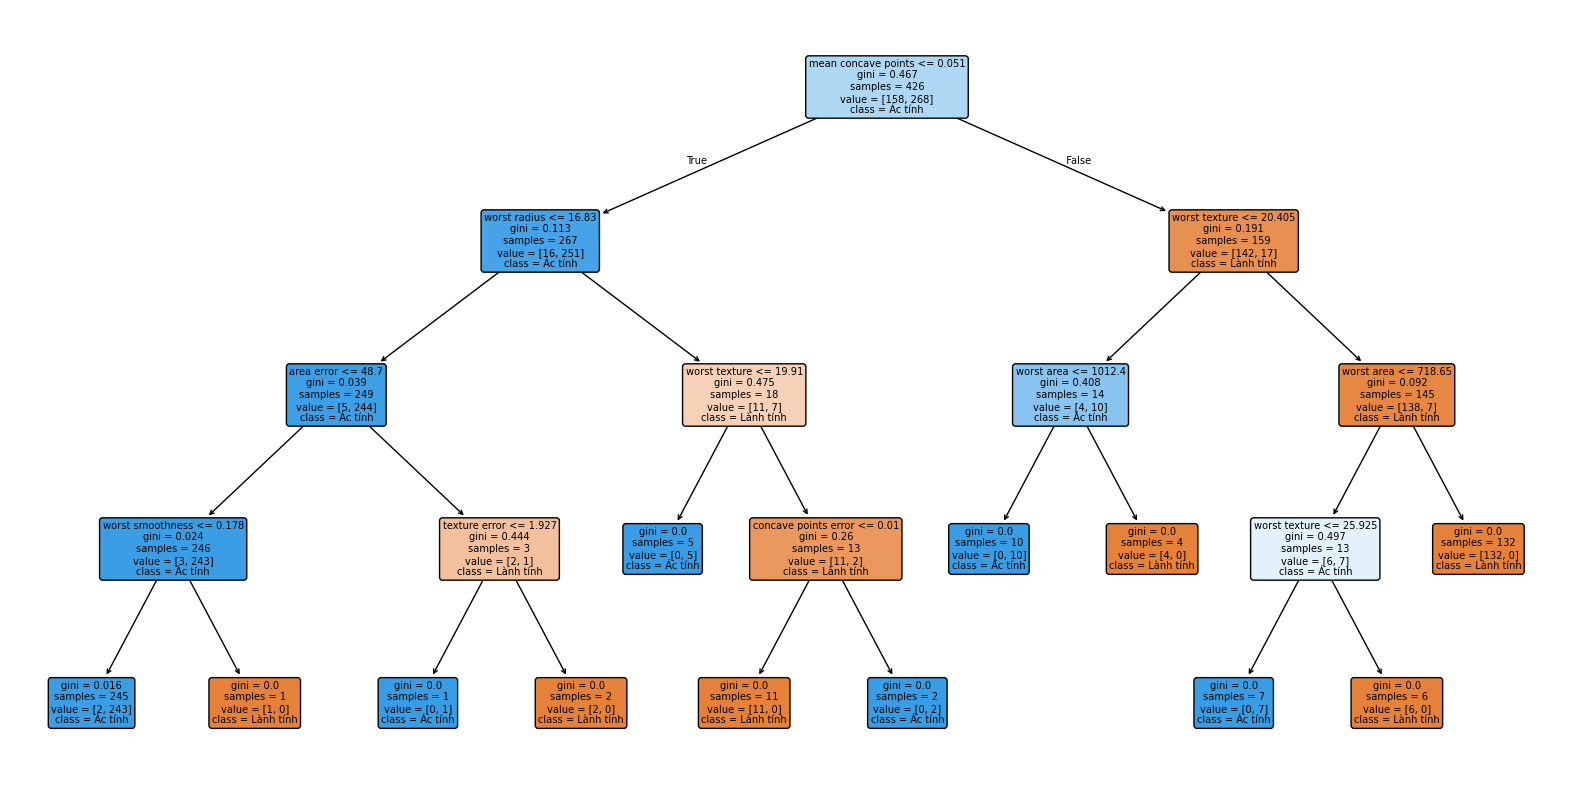

In [13]:
# Vẽ tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, 
          feature_names=data.feature_names,
          class_names=['Lành tính', 'Ác tính'],
          filled=True,
          rounded=True)
plt.show()

In [14]:
# In ra các đặc trưng quan trọng nhất
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': dt_classifier.feature_importances_
})
print("\nĐộ quan trọng của các đặc trưng:")
print(feature_importance.sort_values('importance', ascending=False).head(10))


Độ quan trọng của các đặc trưng:
                 feature  importance
7    mean concave points    0.710108
21         worst texture    0.117840
23            worst area    0.064553
20          worst radius    0.060194
17  concave points error    0.017372
13            area error    0.013032
24      worst smoothness    0.010057
11         texture error    0.006844
3              mean area    0.000000
4        mean smoothness    0.000000
